In [12]:
import pandas as pd
import pyreadstat

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# List of variables to check
variables_to_check = [
    'ICITVOTE','PARTYSUPP'
]

# Print the variable names, descriptions, and their value labels
for variable in variables_to_check:
    if variable in meta.column_names:
        # Get the label (description) for the variable
        label = meta.column_labels[meta.column_names.index(variable)]
        print(f"{variable}: {label}")
        
        # Get the value labels (scoring system) if available
        if variable in meta.variable_to_label:
            value_labels = meta.value_labels.get(meta.variable_to_label[variable], {})
            if value_labels:
                print("  Value Labels (Scoring System):")
                for value, label in value_labels.items():
                    print(f"    {value}: {label}")
        else:
            print("  No value labels available for this variable.")
    else:
        print(f"{variable}: Label not found")
    print()  # Add space between variables

ICITVOTE: Important for a good citizen: vote in elections?
  Value Labels (Scoring System):
    -9.0: Break off
    -7.0: Legal skip
    -3.0: Interviewer error
    -2.0: Refuse to answer
    -1.0: Don't know
    1.0: Not important at all
    10.0: Extremely important

PARTYSUPP: Which political party is closest to you?
  Value Labels (Scoring System):
    -9.0: Break off
    -7.0: Legal skip
    -5.0: There is no such party
    -3.0: Interviewer error
    -2.0: Refuse to answer
    -1.0: Don't know
    101.0: Civil Contract
    102.0: Mission Party
    103.0: Bright Armenia
    104.0: Prosperous Armenia
    105.0: Republican Party of Armenia
    106.0: Armenian Revolutionary Federation
    107.0: Free Democrats
    108.0: Hanrapetutyun Party
    109.0: Sasna Tsrer Party
    301.0: Georgian Dream
    302.0: United National Movement
    303.0: Movement for Liberty - European Georgia
    304.0: Alliance of Patriots of Georgia
    305.0: Labor Party
    306.0: Democratic Movement – United

/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/325153341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['RESPSEX'] = df_filtered['RESPSEX'].map({1.0: 'Male', 2.0: 'Female'})


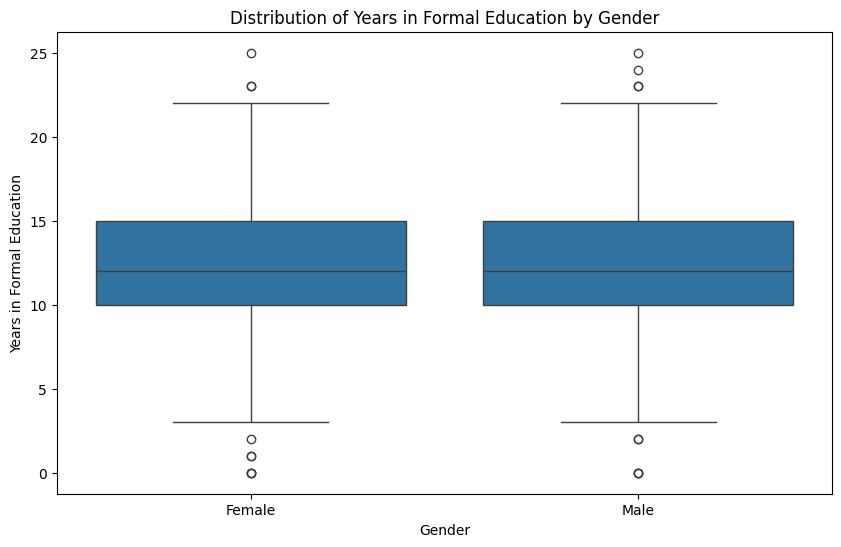

In [2]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter the dataset to include only relevant responses for RESPSEX and EDUYRS
df_filtered = df[(df['RESPSEX'].isin([1.0, 2.0])) & (df['EDUYRS'] >= 0)]

# Map the numeric values to their corresponding labels for RESPSEX
df_filtered['RESPSEX'] = df_filtered['RESPSEX'].map({1.0: 'Male', 2.0: 'Female'})

# Plot the distribution of EDUYRS by gender using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='RESPSEX', y='EDUYRS')
plt.title('Distribution of Years in Formal Education by Gender')
plt.xlabel('Gender')
plt.ylabel('Years in Formal Education')
plt.show()

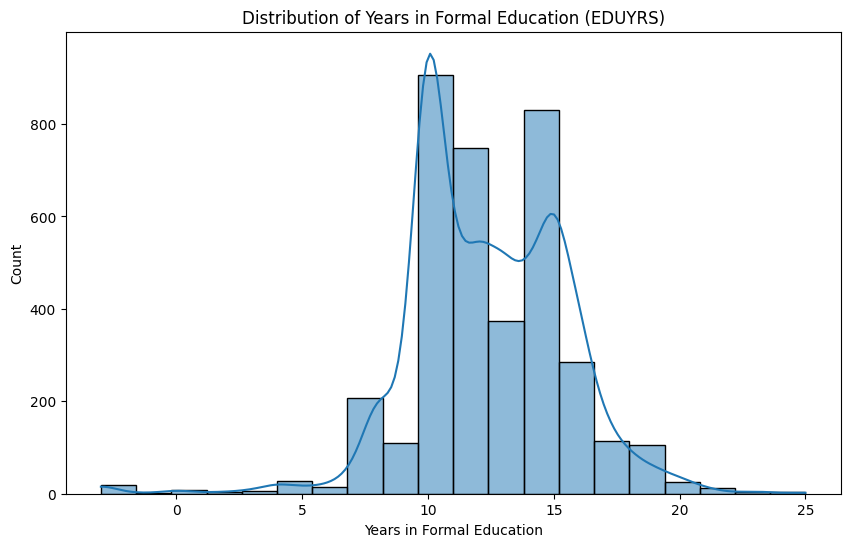

In [3]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Plot the distribution of EDUYRS using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['EDUYRS'], bins=20, kde=True)
plt.title('Distribution of Years in Formal Education (EDUYRS)')
plt.xlabel('Years in Formal Education')
plt.ylabel('Count')
plt.show()

/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/2187868968.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['RESPSEX'] = df_filtered['RESPSEX'].map({1.0: 'Male', 2.0: 'Female'})
/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/2187868968.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})


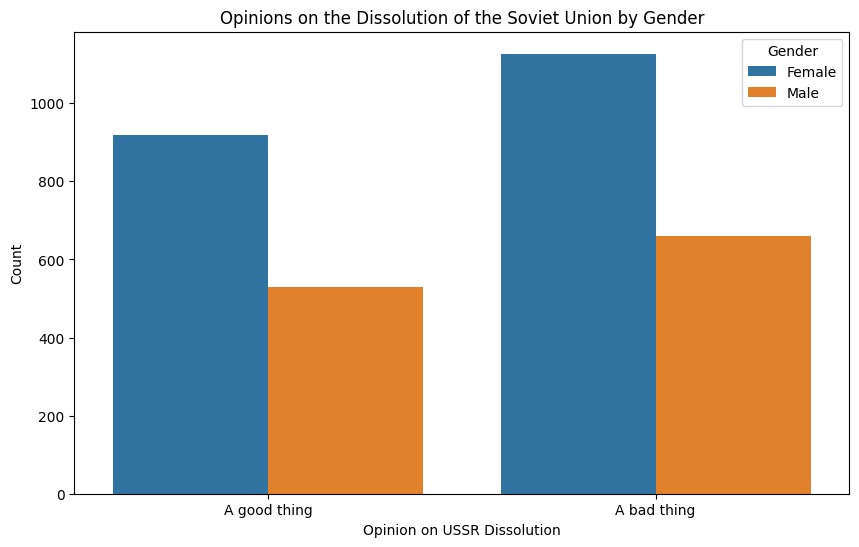

In [4]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter the dataset to include only relevant responses for REPSEX and USSRDISS
df_filtered = df[(df['RESPSEX'].isin([1.0, 2.0])) & (df['USSRDISS'].isin([1.0, 2.0]))]

# Map the numeric values to their corresponding labels for better readability in the plot
df_filtered['RESPSEX'] = df_filtered['RESPSEX'].map({1.0: 'Male', 2.0: 'Female'})
df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})

# Create a count plot to visualize the relationship between RESPSEX and USSRDISS
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='USSRDISS', hue='RESPSEX')
plt.title('Opinions on the Dissolution of the Soviet Union by Gender')
plt.xlabel('Opinion on USSR Dissolution')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/1603903340.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Education Level'] = pd.cut(df_filtered['EDUYRS'], bins=[0, 12, 16, df['EDUYRS'].max()],
/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/1603903340.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})


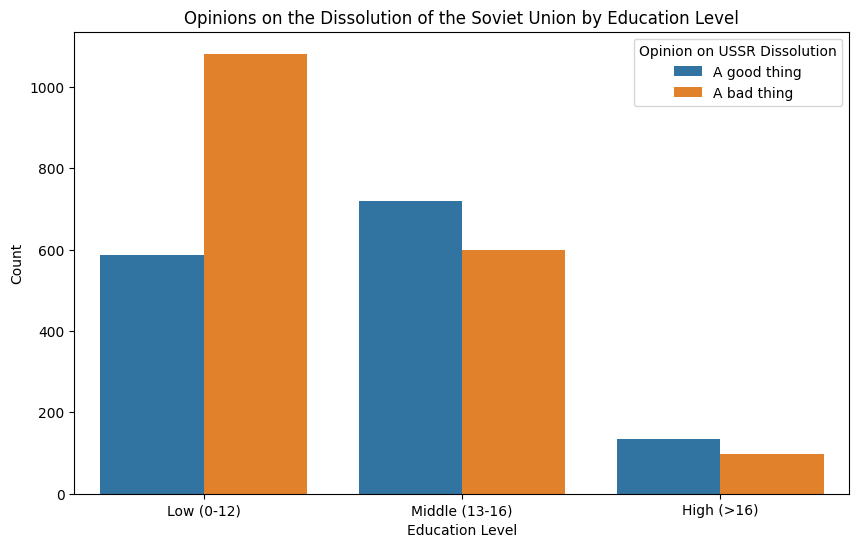

In [5]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter the dataset to exclude negative values for EDUYRS and USSRDISS
df_filtered = df[(df['EDUYRS'] >= 0) & (df['USSRDISS'].isin([1.0, 2.0]))]

# Create a new column for education level based on the ranges
df_filtered['Education Level'] = pd.cut(df_filtered['EDUYRS'], bins=[0, 12, 16, df['EDUYRS'].max()], 
                                        labels=['Low (0-12)', 'Middle (13-16)', 'High (>16)'], right=True)

# Map USSRDISS values to their corresponding labels
df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})

# Plot the relationship between Education Level and Opinion on USSR Dissolution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Education Level', hue='USSRDISS')
plt.title('Opinions on the Dissolution of the Soviet Union by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Opinion on USSR Dissolution')
plt.show()

/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/2083855301.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Education Level'] = pd.cut(df_filtered['EDUYRS'],
/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/2083855301.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})


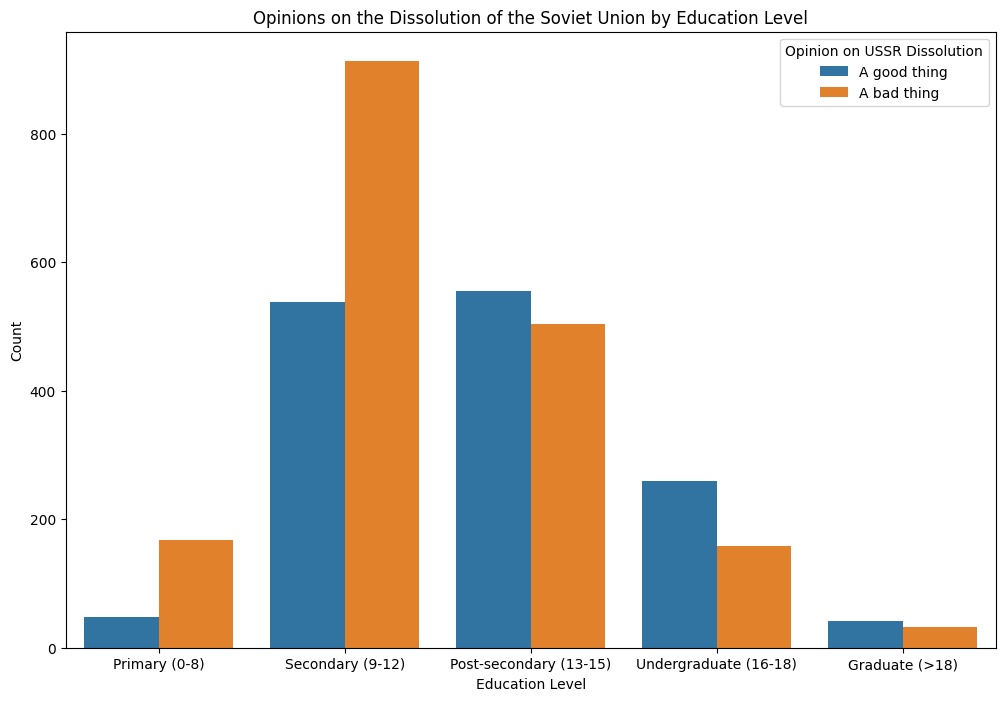

In [6]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter the dataset to exclude negative values for EDUYRS and USSRDISS
df_filtered = df[(df['EDUYRS'] >= 0) & (df['USSRDISS'].isin([1.0, 2.0]))]

# Create a new column for education level based on the specified ranges
df_filtered['Education Level'] = pd.cut(df_filtered['EDUYRS'], 
                                        bins=[0, 8, 12, 15, 18, df['EDUYRS'].max()], 
                                        labels=['Primary (0-8)', 'Secondary (9-12)', 
                                                'Post-secondary (13-15)', 'Undergraduate (16-18)', 
                                                'Graduate (>18)'], right=True)

# Map USSRDISS values to their corresponding labels
df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})

# Plot the relationship between Education Level and Opinion on USSR Dissolution
plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered, x='Education Level', hue='USSRDISS')
plt.title('Opinions on the Dissolution of the Soviet Union by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Opinion on USSR Dissolution')
plt.show()

/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/3862393575.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})


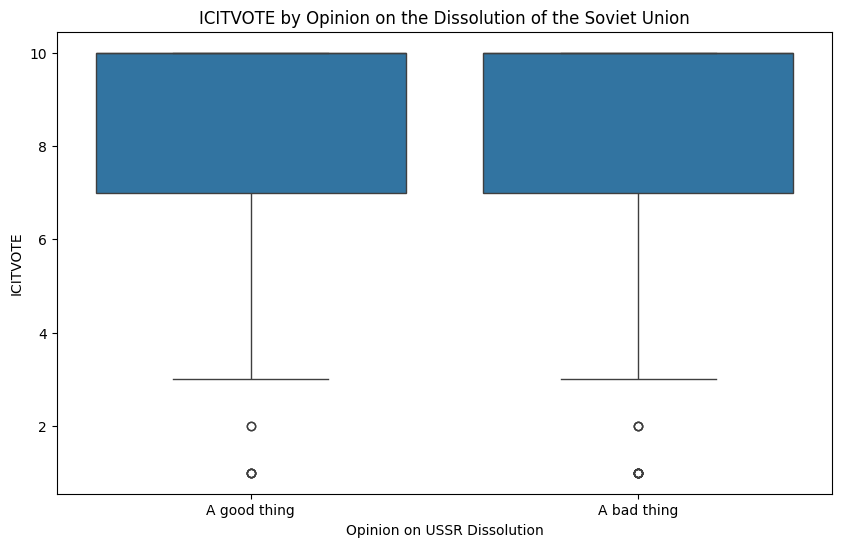

In [9]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter the dataset to exclude negative values for USSRDISS and ICITVOTE
df_filtered = df[(df['USSRDISS'].isin([1.0, 2.0])) & (df['ICITVOTE'] >= 0)]

# Map USSRDISS values to their corresponding labels
df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})

# Plot the relationship between USSRDISS and ICITVOTE using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='USSRDISS', y='ICITVOTE')
plt.title('ICITVOTE by Opinion on the Dissolution of the Soviet Union')
plt.xlabel('Opinion on USSR Dissolution')
plt.ylabel('ICITVOTE')
plt.show()

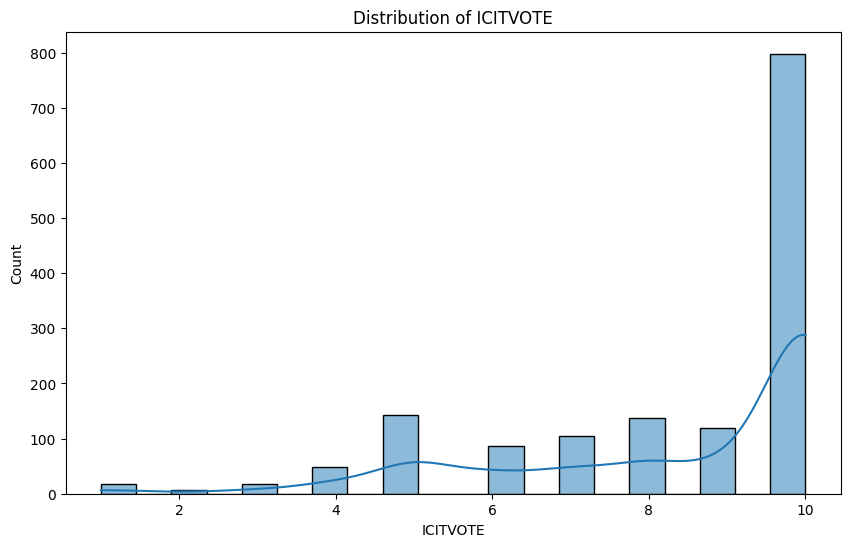

In [10]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter out negative values for ICITVOTE
df_filtered = df[df['ICITVOTE'] >= 0]

# Plot the distribution of ICITVOTE using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['ICITVOTE'], bins=20, kde=True)
plt.title('Distribution of ICITVOTE')
plt.xlabel('ICITVOTE')
plt.ylabel('Count')
plt.show()

In [11]:
import pandas as pd
import pyreadstat
import statsmodels.api as sm

# Load the dataset
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter out negative values for USSRDISS and ICITVOTE
df_filtered = df[(df['USSRDISS'].isin([1.0, 2.0])) & (df['ICITVOTE'] >= 0)]

# Map USSRDISS values to numerical labels for regression
df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 1, 2.0: 0})

# Define the independent variable (USSRDISS) and dependent variable (ICITVOTE)
X = df_filtered['USSRDISS']
y = df_filtered['ICITVOTE']

# Add a constant to the independent variable for the regression model
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ICITVOTE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.003136
Date:                Tue, 27 Aug 2024   Prob (F-statistic):              0.955
Time:                        20:52:47   Log-Likelihood:                -2760.2
No. Observations:                1263   AIC:                             5524.
Df Residuals:                    1261   BIC:                             5535.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4575      0.085     99.881      0.0

/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/2087911787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 1, 2.0: 0})


/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/3248167780.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})


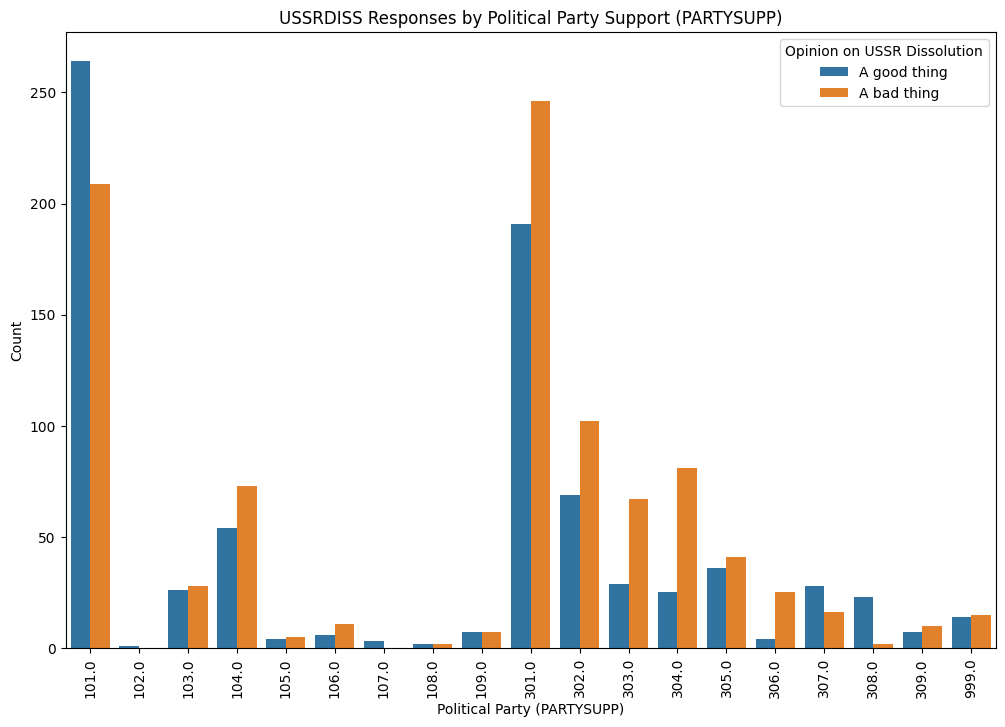

In [13]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter the dataset to exclude negative values for USSRDISS and PARTYSUPP
df_filtered = df[(df['USSRDISS'].isin([1.0, 2.0])) & (df['PARTYSUPP'] >= 0)]

# Map USSRDISS values to their corresponding labels
df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})

# Plot the number of each answer of USSRDISS by each PARTYSUPP
plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered, x='PARTYSUPP', hue='USSRDISS')
plt.title('USSRDISS Responses by Political Party Support (PARTYSUPP)')
plt.xlabel('Political Party (PARTYSUPP)')
plt.ylabel('Count')
plt.legend(title='Opinion on USSR Dissolution')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/1574686540.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})
/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/1574686540.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PARTYSUPP'] = df_filtered['PARTYSUPP'].map(partysupp_labels)


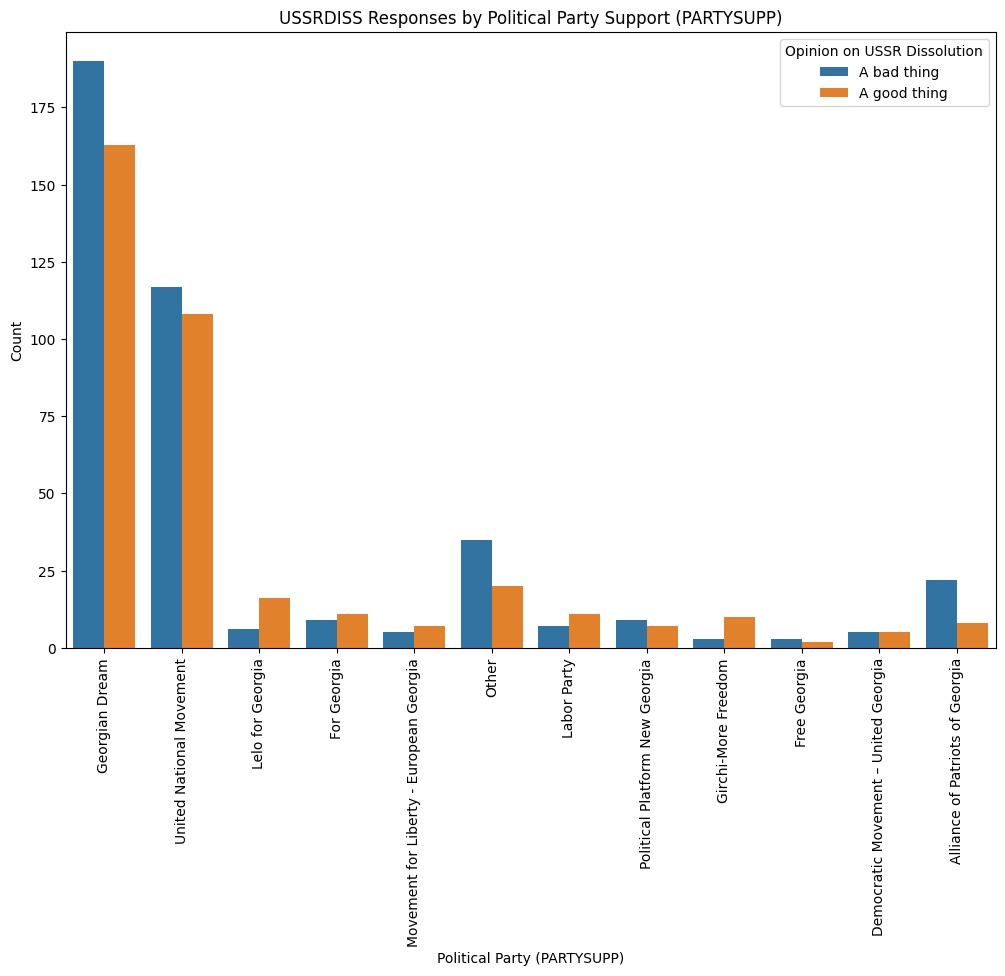

In [20]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2021_CB_2022_Regional_15.08.2022.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Filter the dataset to exclude negative values for USSRDISS and PARTYSUPP
df_filtered = df[(df['USSRDISS'].isin([1.0, 2.0])) & (df['PARTYSUPP'] >= 0)]

# Map USSRDISS values to their corresponding labels
df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})

# Map PARTYSUPP values to their corresponding labels using the metadata
partysupp_labels = meta.value_labels.get(meta.variable_to_label.get('PARTYSUPP'), {})
df_filtered['PARTYSUPP'] = df_filtered['PARTYSUPP'].map(partysupp_labels)

# Plot the number of each answer of USSRDISS by each PARTYSUPP
plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered, x='PARTYSUPP', hue='USSRDISS')
plt.title('USSRDISS Responses by Political Party Support (PARTYSUPP)')
plt.xlabel('Political Party (PARTYSUPP)')
plt.ylabel('Count')
plt.legend(title='Opinion on USSR Dissolution')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

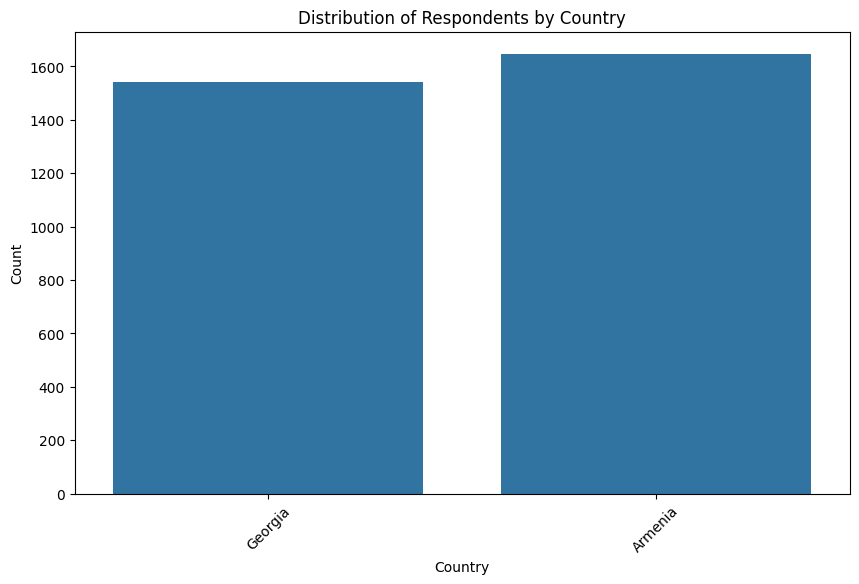

In [18]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2021_CB_2022_Regional_15.08.2022.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Map COUNTRY values to their corresponding labels using the metadata
country_labels = meta.value_labels.get(meta.variable_to_label.get('COUNTRY'), {})
df['COUNTRY'] = df['COUNTRY'].map(country_labels)

# Plot the distribution of respondents by country
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='COUNTRY')
plt.title('Distribution of Respondents by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/2055163641.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})
/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/2055163641.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PARTYSUPP'] = df_filtered['PARTYSUPP'].map(partysupp_labels)


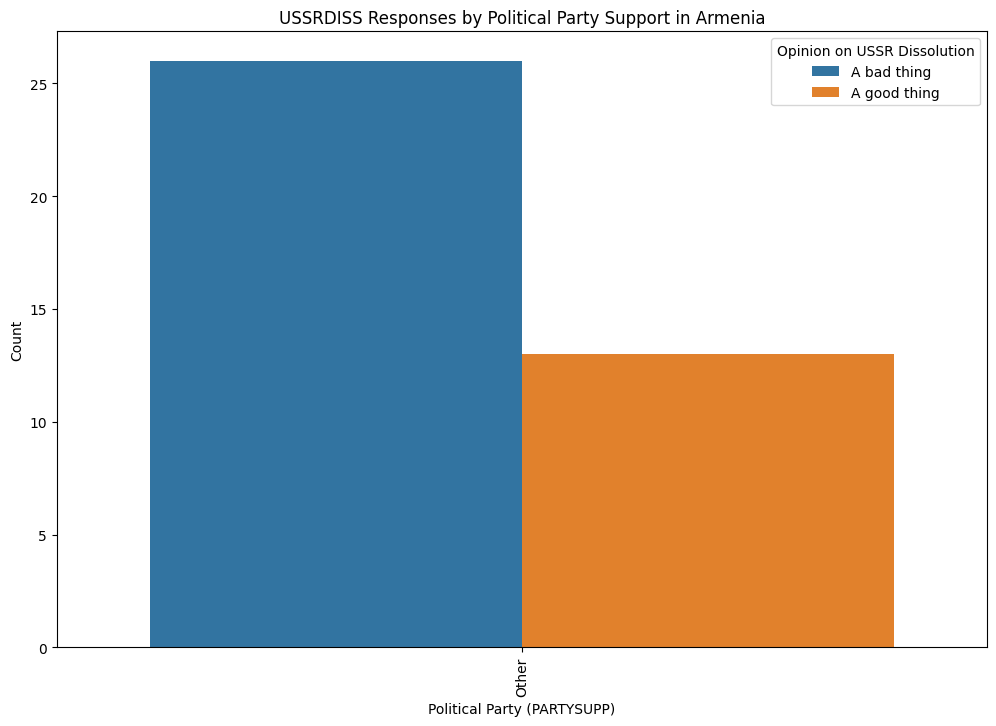

In [19]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2021_CB_2022_Regional_15.08.2022.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Map COUNTRY values to their corresponding labels using the metadata
country_labels = meta.value_labels.get(meta.variable_to_label.get('COUNTRY'), {})
df['COUNTRY'] = df['COUNTRY'].map(country_labels)

# Filter the dataset to include only Armenia data
df_armenia = df[df['COUNTRY'] == 'Armenia']

# Filter the dataset to exclude negative values for USSRDISS and PARTYSUPP
df_filtered = df_armenia[(df_armenia['USSRDISS'].isin([1.0, 2.0])) & (df_armenia['PARTYSUPP'] >= 0)]

# Map USSRDISS values to their corresponding labels
df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})

# Map PARTYSUPP values to their corresponding labels using the metadata
partysupp_labels = meta.value_labels.get(meta.variable_to_label.get('PARTYSUPP'), {})
df_filtered['PARTYSUPP'] = df_filtered['PARTYSUPP'].map(partysupp_labels)

# Plot the number of each answer of USSRDISS by each PARTYSUPP
plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered, x='PARTYSUPP', hue='USSRDISS')
plt.title('USSRDISS Responses by Political Party Support in Armenia')
plt.xlabel('Political Party (PARTYSUPP)')
plt.ylabel('Count')
plt.legend(title='Opinion on USSR Dissolution')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/569992782.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})
/var/folders/j_/qqz644t913ddsw193nzrjqrm0000gn/T/ipykernel_18090/569992782.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PARTYSUPP'] = df_filtered['PARTYSUPP'].map(partysupp_labels)


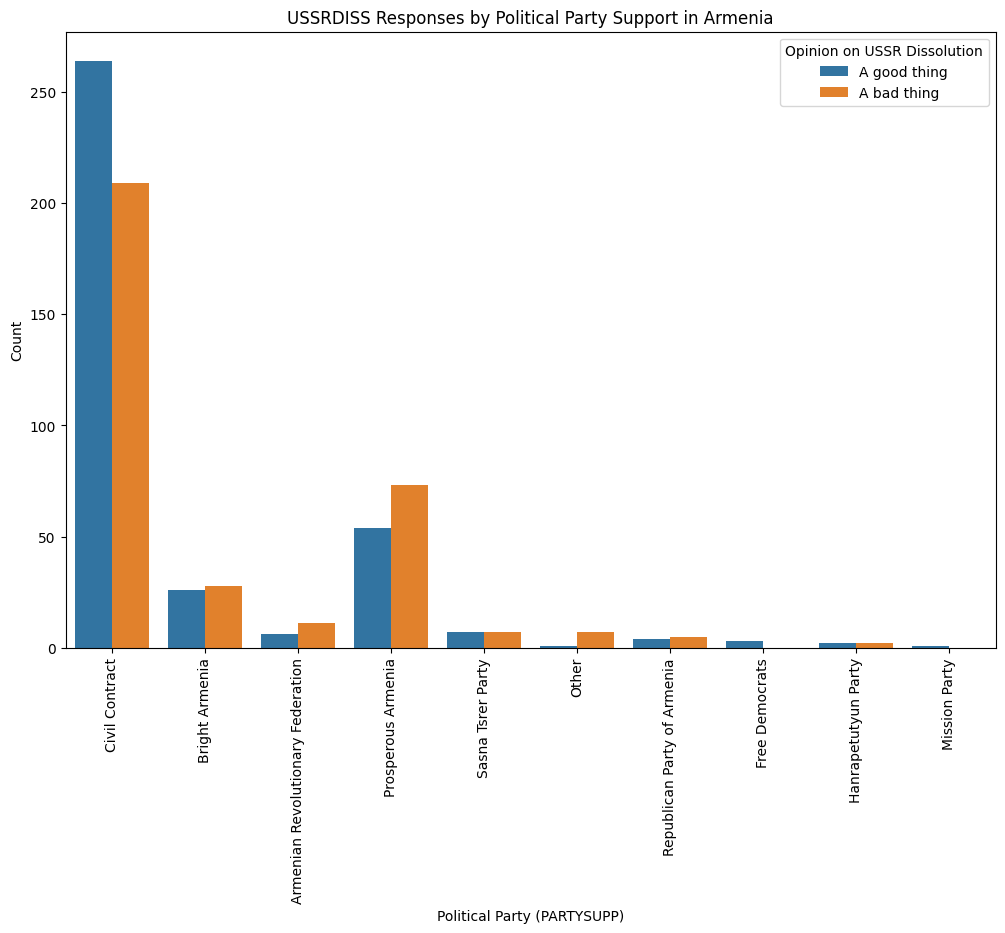

In [21]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with metadata
file_path = "./CAUCASUS BAROMETER/cb2019_CB_2019_Regional_25.06.2020.sav"
df, meta = pyreadstat.read_sav(file_path, encoding='UTF-8', disable_datetime_conversion=True)

# Map COUNTRY values to their corresponding labels using the metadata
country_labels = meta.value_labels.get(meta.variable_to_label.get('COUNTRY'), {})
df['COUNTRY'] = df['COUNTRY'].map(country_labels)

# Filter the dataset to include only Armenia data
df_armenia = df[df['COUNTRY'] == 'Armenia']

# Filter the dataset to exclude negative values for USSRDISS and PARTYSUPP
df_filtered = df_armenia[(df_armenia['USSRDISS'].isin([1.0, 2.0])) & (df_armenia['PARTYSUPP'] >= 0)]

# Map USSRDISS values to their corresponding labels
df_filtered['USSRDISS'] = df_filtered['USSRDISS'].map({1.0: 'A good thing', 2.0: 'A bad thing'})

# Map PARTYSUPP values to their corresponding labels using the metadata
partysupp_labels = meta.value_labels.get(meta.variable_to_label.get('PARTYSUPP'), {})
df_filtered['PARTYSUPP'] = df_filtered['PARTYSUPP'].map(partysupp_labels)

# Plot the number of each answer of USSRDISS by each PARTYSUPP
plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered, x='PARTYSUPP', hue='USSRDISS')
plt.title('USSRDISS Responses by Political Party Support in Armenia')
plt.xlabel('Political Party (PARTYSUPP)')
plt.ylabel('Count')
plt.legend(title='Opinion on USSR Dissolution')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()